<a href="https://colab.research.google.com/github/krishnakaushik25/handwritten_digit_recognizer-DL/blob/master/PyTorch_RNNs_and_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import seaborn as sns
import random

# To display youtube videos
from IPython.display import YouTubeVideo


def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

 RNN with 1 Layer and 1 Neuron

In [ ]:
# ==== STATICS ====
n_inputs = 4
n_neurons = 1
# =================

# RNN inputs
input0 = torch.tensor([[0, 1, 2, 0], [3, 4, 5, 0], [6, 7, 8, 0], [9, 0, 1, 0]], dtype = torch.float)
print('input time_0 shape:', input0.shape)

input1 = torch.tensor([[9, 8, 7, 0], [3, 4, 5, 0], [6, 7, 8, 0], [9, 0, 1, 0]], dtype = torch.float)
print('input time_1 shape:', input1.shape)

input time_0 shape: torch.Size([4, 4])
input time_1 shape: torch.Size([4, 4])


In [ ]:
# The Neural Network
class RNNVanilla(nn.Module):
    # __init__: the function where we create the architecture
    def __init__(self, n_inputs, n_neurons):
        super(RNNVanilla, self).__init__()
        
        # Weights are random at first
        # U contains connection weights for the inputs of the current time step
        self.U = torch.randn(n_inputs, n_neurons) # for 1 neuron: size = 4 rows and 1 column
        
        # W contains connection weights for the outputs of the previous time step
        self.W = torch.randn(n_neurons, n_neurons) # for 1 neuron: size = 1 row and 1 column
        
        # The bias
        self.b = torch.zeros(1, n_neurons) # for 1 neuron: size = 1 row and 1 column
    
    # forward: function where we apply the architecture to the input
    def forward(self, input0, input1):
        # Computes two outputs, one for each time step (two overall).
        self.output0 = torch.tanh(torch.mm(input0, self.U) + self.b)
        
        self.output1 = torch.tanh(torch.mm(self.output0, self.W) + torch.mm(input1, self.U) + self.b)
        
        return self.output0, self.output1

In [ ]:
# Creating the model
rnn_1_neuron = RNNVanilla(n_inputs, n_neurons)

# Checking the output
output0, output1 = rnn_1_neuron(input0, input1)
print('output0:', output0, '\n')
print('output1:', output1)

output0: tensor([[-0.9247],
        [-0.9973],
        [-0.9999],
        [-0.5345]]) 

output1: tensor([[-0.9937],
        [-0.9910],
        [-0.9997],
        [-0.2628]])


In [ ]:
# Parameters
print('U:', rnn_1_neuron.U)
print('W:', rnn_1_neuron.W)
print('bias:', rnn_1_neuron.b)

U: tensor([[ 0.0461],
        [ 0.4024],
        [-1.0115],
        [ 0.2167]])
W: tensor([[-0.6123]])
bias: tensor([[0.]])


RNN with 1 Layer and Multiple Neurons 

In [ ]:
# ==== STATICS ====
n_inputs = 3
n_neurons = 5
# =================

# RNN inputs
input0 = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]], dtype = torch.float)
print('input time_0 shape:', input0.shape)

input1 = torch.tensor([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]], dtype = torch.float)
print('input time_1 shape:', input1.shape)

input time_0 shape: torch.Size([4, 3])
input time_1 shape: torch.Size([4, 3])


In [ ]:
# Creating the model
rnn_n_neurons = RNNVanilla(n_inputs, n_neurons)

# Checking the output
output0, output1 = rnn_n_neurons(input0, input1)
print('output0:', output0, '\n')
print('output1:', output1)

output0: tensor([[ 0.9538, -0.6534,  0.7879, -0.8832, -0.9953],
        [ 1.0000, -0.9287,  0.9998, -1.0000, -0.8423],
        [ 1.0000, -0.9870,  1.0000, -1.0000,  0.5144],
        [ 1.0000,  0.9486,  1.0000, -0.9840,  1.0000]]) 

output1: tensor([[ 1.0000, -0.9795,  1.0000, -1.0000,  1.0000],
        [-0.4268, -0.6269,  0.9398,  0.9575, -0.9623],
        [ 1.0000, -0.9559,  1.0000, -1.0000,  0.9999],
        [ 0.9991,  0.5718,  0.9485, -0.9160,  0.9999]])


In [ ]:
# Parameters
print('U:', rnn_n_neurons.U)
print('W:', rnn_n_neurons.W)
print('bias:', rnn_n_neurons.b)

U: tensor([[ 0.5036,  0.2310,  0.6931, -0.2669,  2.1785],
        [ 0.1021, -0.2590, -0.1549, -1.3706, -0.1319],
        [ 0.8848, -0.2611,  0.6104, -0.0098, -1.4473]])
W: tensor([[ 0.7667,  0.0190,  0.0220,  1.1532, -0.3393],
        [ 0.1559,  0.8966, -0.2968, -0.6857,  0.9247],
        [ 0.1825, -0.0737,  0.3147, -1.0369,  0.2100],
        [ 0.6144, -0.0552, -0.3297, -1.7970,  0.8728],
        [ 0.7670, -0.1138, -0.9428,  0.7540,  0.1365]])
bias: tensor([[0., 0., 0., 0., 0.]])


Vanilla RNN for MNIST Classification

In [ ]:
# Customized transform (transforms to tensor, here you can normalize, perform Data Augmentation etc.)
my_transform = transforms.Compose([transforms.ToTensor()])

# Download data
mnist_train = torchvision.datasets.MNIST('data', train = True, download=True, transform=my_transform)
mnist_test = torchvision.datasets.MNIST('data', train = False, download=True, transform=my_transform)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


RNN Architecture for MNIST Classification

In [ ]:
# The Neural Network
class VanillaRNN_MNIST(nn.Module):
    def __init__(self, batch_size, input_size, hidden_size, output_size):
        super(VanillaRNN_MNIST, self).__init__()
        self.batch_size, self.input_size, self.hidden_size, self.output_size = batch_size, input_size, hidden_size, output_size
        
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_size)
        # Fully Connected Layer
        self.layer = nn.Linear(hidden_size, self.output_size)
    
    def forward(self, images, prints=False):
        if prints: print('Original Images Shape:', images.shape)
        
        images = images.permute(1, 0, 2)
        if prints: print('Permuted Imaged Shape:', images.shape)
        
        # Initialize hidden state with zeros
        hidden_state = torch.zeros(1, self.batch_size, self.hidden_size)
        if prints: print('Initial hidden state Shape:', hidden_state.shape)
        
        # Creating RNN
        hidden_outputs, hidden_state = self.rnn(images, hidden_state)
        
        # Log probabilities
        out = self.layer(hidden_state)
        
        if prints:
            print('----hidden_outputs shape:', hidden_outputs.shape, '\n' +
                  '----final hidden state:', hidden_state.shape, '\n' +
                  '----out shape:', out.shape)
        
        # Reshaped out
        out = out.view(-1, self.output_size)
        if prints: print('Out Final Shape:', out.shape)
        
        return out

In [ ]:
batch_size = 64        # how many images to be trained in one iteration
input_size = 28        # image 28 by 28
hidden_size = 150      # can be changed to any number: neurons
output_size = 10       # 10 different digits

In [ ]:
# Create a train_loader to select a batch from it
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64)

# Select one full batch from the data
images_example, labels_example = next(iter(train_loader))
print('original images shape:', images_example.shape)

# Reshape
images_example = images_example.view(-1, 28, 28)
print('changed images shape:', images_example.shape)
print('labels shape:', labels_example.shape, '\n')

# Creating the model
model_example = VanillaRNN_MNIST(batch_size, input_size, hidden_size, output_size)


out = model_example(images_example, prints=True)

original images shape: torch.Size([64, 1, 28, 28])
changed images shape: torch.Size([64, 28, 28])
labels shape: torch.Size([64]) 

Original Images Shape: torch.Size([64, 28, 28])
Permuted Imaged Shape: torch.Size([28, 64, 28])
Initial hidden state Shape: torch.Size([1, 64, 150])
----hidden_outputs shape: torch.Size([28, 64, 150]) 
----final hidden state: torch.Size([1, 64, 150]) 
----out shape: torch.Size([1, 64, 10])
Out Final Shape: torch.Size([64, 10])


In [ ]:
# Understand Model Parameters
print('Len parameters:', len(list(model_example.parameters())), '\n' +
      'Parameters 0 - U:', list(model_example.parameters())[0].shape, '\n' +
      'Parameters 1 - W:', list(model_example.parameters())[1].shape, '\n' +
      'Parameters 2 - Bias:', list(model_example.parameters())[2].shape, '\n' +
      'Parameters 3 - Bias:', list(model_example.parameters())[3].shape, '\n' +
      'Parameters 4 - FNN weights:', list(model_example.parameters())[4].shape, '\n' +
      'Parameters 5 - Predictions:', list(model_example.parameters())[5].shape)

Len parameters: 6 
Parameters 0 - U: torch.Size([150, 28]) 
Parameters 1 - W: torch.Size([150, 150]) 
Parameters 2 - Bias: torch.Size([150]) 
Parameters 3 - Bias: torch.Size([150]) 
Parameters 4 - FNN weights: torch.Size([10, 150]) 
Parameters 5 - Predictions: torch.Size([10])


In [ ]:
def get_accuracy(out, actual_labels, batchSize):
    '''Saves the Accuracy of the batch.
    Takes in the log probabilities, actual label and the batchSize (to average the score).'''
    predictions = out.max(dim=1)[1]
    correct = (predictions == actual_labels).sum().item()
    accuracy = correct/batch_size
    
    return accuracy

In [ ]:
def train_network(model, train_data, test_data, batchSize=64, num_epochs=1, learning_rate=0.001):
    
    '''Trains the model and computes the average accuracy for train and test data.'''
    
    print('Get data ready...')
    # Create dataloader for training dataset - so we can train on multiple batches
    # Shuffle after every epoch
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True, drop_last=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batchSize, shuffle=True, drop_last=True)
    
    # Create criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    
    print('Training started...')
    # Train the data multiple times
    for epoch in range(num_epochs):
        
        # Save Train and Test Loss
        train_loss = 0
        train_acc = 0
        
        # Set model in training mode:
        model.train()
        
        for k, (images, labels) in enumerate(train_loader):
            
            # Get rid of the channel
            images = images.view(-1, 28, 28)
            
            # Create log probabilities
            out = model(images)
            # Clears the gradients from previous iteration
            optimizer.zero_grad()
            # Computes loss: how far is the prediction from the actual?
            loss = criterion(out, labels)
            # Computes gradients for neurons
            loss.backward()
            # Updates the weights
            optimizer.step()
            
            # Save Loss & Accuracy after each iteration
            train_loss += loss.item()
            train_acc += get_accuracy(out, labels, batchSize)
            
        
        # Print Average Train Loss & Accuracy after each epoch
        print('TRAIN | Epoch: {}/{} | Loss: {:.2f} | Accuracy: {:.2f}'.format(epoch+1, num_epochs, train_loss/k, train_acc/k))
            
            
    print('Testing Started...')
    # Save Test Accuracy
    test_acc = 0
    # Evaluation mode
    model.eval()
    
    for k, (images, labels) in enumerate(test_loader):
        # Get rid of the channel
        images = images.view(-1, 28, 28)
        
        # Create logit predictions
        out = model(images)
        # Add Accuracy of this batch
        test_acc += get_accuracy(out, labels, batchSize)
        
    # Print Final Test Accuracy
    print('TEST | Average Accuracy per {} Loaders: {:.5f}'.format(k, test_acc/k) )

In [ ]:
# ==== STATICS ====
batch_size=64
input_size=28
hidden_size=150
output_size=10

# Instantiate the model
vanilla_rnn = VanillaRNN_MNIST(batch_size, input_size, hidden_size, output_size)

# ==== TRAIN ====
train_network(vanilla_rnn, mnist_train, mnist_test, num_epochs=10)

Get data ready...
Training started...
TRAIN | Epoch: 1/10 | Loss: 0.79 | Accuracy: 0.74
TRAIN | Epoch: 2/10 | Loss: 0.38 | Accuracy: 0.89
TRAIN | Epoch: 3/10 | Loss: 0.29 | Accuracy: 0.92
TRAIN | Epoch: 4/10 | Loss: 0.24 | Accuracy: 0.93
TRAIN | Epoch: 5/10 | Loss: 0.21 | Accuracy: 0.94
TRAIN | Epoch: 6/10 | Loss: 0.19 | Accuracy: 0.95
TRAIN | Epoch: 7/10 | Loss: 0.18 | Accuracy: 0.95
TRAIN | Epoch: 8/10 | Loss: 0.16 | Accuracy: 0.95
TRAIN | Epoch: 9/10 | Loss: 0.15 | Accuracy: 0.96
TRAIN | Epoch: 10/10 | Loss: 0.14 | Accuracy: 0.96
Testing Started...
TEST | Average Accuracy per 155 Loaders: 0.97258


Multilayer RNNs

Multilayer RNN for MNIST Classification 

In [ ]:
class MultilayerRNN_MNIST(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size, relu=True):
        super(MultilayerRNN_MNIST, self).__init__()
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
        # Create RNN
        if relu:
            self.rnn = nn.RNN(input_size, hidden_size, layer_size, batch_first=True, nonlinearity='relu')
        else:
            self.rnn = nn.RNN(input_size, hidden_size, layer_size, batch_first=True, nonlinearity='tanh')
            
        # Create FNN
        self.fnn = nn.Linear(hidden_size, output_size)
        
    def forward(self, images, prints=False):
        if prints: print('images shape:', images.shape)
        
        # Instantiate hidden_state at timestamp 0
        hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
        hidden_state = hidden_state.requires_grad_()
        if prints: print('Hidden State shape:', hidden_state.shape)
        
        # Compute RNN
        # .detach() is required to prevent vanishing gradient problem
        output, last_hidden_state = self.rnn(images, hidden_state.detach())
        if prints: print('RNN Output shape:', output.shape, '\n' +
                         'RNN last_hidden_state shape', last_hidden_state.shape)
        
        # Compute FNN
        # We get rid of the second size
        output = self.fnn(output[:, -1, :])
        if prints: print('FNN Output shape:', output.shape)
        
        return output

In [ ]:
# ===== STATICS =====
batch_size = 64
input_size = 28
hidden_size = 100      # neurons
layer_size = 2         # layers
output_size = 10
# ===================

In [ ]:
train_loader_example = torch.utils.data.DataLoader(mnist_train, batch_size=64)

# Taking a single batch of the images
images, labels = next(iter(train_loader_example))
print('original images shape:', images.shape)

# Remove channel from shape
images = images.reshape(-1, 28, 28)
print('reshaped images shape:', images.shape, '\n')

# Create model instance
multilayer_rnn_example = MultilayerRNN_MNIST(input_size, hidden_size, layer_size, output_size, relu=False)
print(multilayer_rnn_example)


# Making log predictions:
out = multilayer_rnn_example(images, prints=True)

original images shape: torch.Size([64, 1, 28, 28])
reshaped images shape: torch.Size([64, 28, 28]) 

MultilayerRNN_MNIST(
  (rnn): RNN(28, 100, num_layers=2, batch_first=True)
  (fnn): Linear(in_features=100, out_features=10, bias=True)
)
images shape: torch.Size([64, 28, 28])
Hidden State shape: torch.Size([2, 64, 100])
RNN Output shape: torch.Size([64, 28, 100]) 
RNN last_hidden_state shape torch.Size([2, 64, 100])
FNN Output shape: torch.Size([64, 10])


In [ ]:
# ==== STATICS ====
batch_size = 64
input_size = 28
hidden_size = 100  
layer_size = 2         
output_size = 10

# Instantiate the model
# We'll use TANH as our activation function
multilayer_rnn = MultilayerRNN_MNIST(input_size, hidden_size, layer_size, output_size, relu=False)

# ==== TRAIN ====
train_network(multilayer_rnn, mnist_train, mnist_test, num_epochs=10)

Get data ready...
Training started...
TRAIN | Epoch: 1/10 | Loss: 0.68 | Accuracy: 0.78
TRAIN | Epoch: 2/10 | Loss: 0.30 | Accuracy: 0.91
TRAIN | Epoch: 3/10 | Loss: 0.23 | Accuracy: 0.93
TRAIN | Epoch: 4/10 | Loss: 0.18 | Accuracy: 0.95
TRAIN | Epoch: 5/10 | Loss: 0.16 | Accuracy: 0.95
TRAIN | Epoch: 6/10 | Loss: 0.15 | Accuracy: 0.96
TRAIN | Epoch: 7/10 | Loss: 0.15 | Accuracy: 0.96
TRAIN | Epoch: 8/10 | Loss: 0.13 | Accuracy: 0.96
TRAIN | Epoch: 9/10 | Loss: 0.13 | Accuracy: 0.96
TRAIN | Epoch: 10/10 | Loss: 0.12 | Accuracy: 0.97
Testing Started...
TEST | Average Accuracy per 155 Loaders: 0.97833


LSTM (Long Short Term Memory RNNs)

In [ ]:
class LSTM_MNIST(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size, bidirectional=True):
        super(LSTM_MNIST, self).__init__()
        
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        self.bidirectional = bidirectional
        
        # Step1: the LSTM model
        self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first=True, bidirectional=bidirectional)
        
        # Step2: the FNN
        if bidirectional: # we'll have 2 more layers
            self.layer = nn.Linear(hidden_size*2, output_size)
        else:
            self.layer = nn.Linear(hidden_size, output_size)
            
            
    def forward(self, images, prints=False):
        if prints: print('images shape:', images.shape)
        
        # Set initial states
        if self.bidirectional:
            # Hidden state:
            hidden_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
            # Cell state:
            cell_state = torch.zeros(self.layer_size*2, images.size(0), self.hidden_size)
        else:
            # Hidden state:
            hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
            # Cell state:
            cell_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
        if prints: print('hidden_state t0 shape:', hidden_state.shape, '\n' +
                         'cell_state t0 shape:', cell_state.shape)
        
        # LSTM:
        output, (last_hidden_state, last_cell_state) = self.lstm(images, (hidden_state, cell_state))
        if prints: print('LSTM: output shape:', output.shape, '\n' +
                         'LSTM: last_hidden_state shape:', last_hidden_state.shape, '\n' +
                         'LSTM: last_cell_state shape:', last_cell_state.shape)
        # Reshape
        output = output[:, -1, :]
        if prints: print('output reshape:', output.shape)
        
        # FNN:
        output = self.layer(output)
        if prints: print('FNN: Final output shape:', output.shape)
        
        return output

In [ ]:
# ====== STATICS ======
batch_size = 64
input_size = 28       # width of image
hidden_size = 128     # number of hidden neurons
layer_size = 2        # number of layers
output_size = 10      # possible choices
# =====================

In [ ]:
# Taking a single batch of the images
images, labels = next(iter(train_loader_example))
print('original images shape:', images.shape)
# Remove channel from shape
images = images.reshape(-1, 28, 28)
print('reshaped images shape:', images.shape, '\n')

# Creating the Model
lstm_example = LSTM_MNIST(input_size, hidden_size, layer_size, output_size)
print('lstm_example:', lstm_example, '\n')

# Making log predictions:
out = lstm_example(images, prints=True)

original images shape: torch.Size([64, 1, 28, 28])
reshaped images shape: torch.Size([64, 28, 28]) 

lstm_example: LSTM_MNIST(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True, bidirectional=True)
  (layer): Linear(in_features=256, out_features=10, bias=True)
) 

images shape: torch.Size([64, 28, 28])
hidden_state t0 shape: torch.Size([4, 64, 128]) 
cell_state t0 shape: torch.Size([4, 64, 128])
LSTM: output shape: torch.Size([64, 28, 256]) 
LSTM: last_hidden_state shape: torch.Size([4, 64, 128]) 
LSTM: last_cell_state shape: torch.Size([4, 64, 128])
output reshape: torch.Size([64, 256])
FNN: Final output shape: torch.Size([64, 10])


In [ ]:
# ==== STATICS ====
batch_size = 64
input_size = 28
hidden_size = 100  
layer_size = 2         
output_size = 10

# Instantiate the model
# We'll use TANH as our activation function
lstm_rnn = LSTM_MNIST(input_size, hidden_size, layer_size, output_size)

# ==== TRAIN ====
train_network(lstm_rnn, mnist_train, mnist_test, num_epochs=10)

Get data ready...
Training started...
TRAIN | Epoch: 1/10 | Loss: 0.48 | Accuracy: 0.84
TRAIN | Epoch: 2/10 | Loss: 0.14 | Accuracy: 0.96
TRAIN | Epoch: 3/10 | Loss: 0.09 | Accuracy: 0.97
TRAIN | Epoch: 4/10 | Loss: 0.07 | Accuracy: 0.98
TRAIN | Epoch: 5/10 | Loss: 0.06 | Accuracy: 0.98
TRAIN | Epoch: 6/10 | Loss: 0.05 | Accuracy: 0.99
TRAIN | Epoch: 7/10 | Loss: 0.04 | Accuracy: 0.99
TRAIN | Epoch: 8/10 | Loss: 0.03 | Accuracy: 0.99
TRAIN | Epoch: 9/10 | Loss: 0.03 | Accuracy: 0.99
TRAIN | Epoch: 10/10 | Loss: 0.03 | Accuracy: 0.99
Testing Started...
TEST | Average Accuracy per 155 Loaders: 0.99365


Confusion Matrix

In [ ]:
def get_confusion_matrix(model, test_data):
    # First we make sure we disable Gradient Computing
    torch.no_grad()
    
    # Model in Evaluation Mode
    model.eval()
    
    preds, actuals = [], []

    for image, label in mnist_test:
        image = image.view(-1, 28, 28)
        out = model(image)

        prediction = torch.max(out, dim=1)[1].item()
        preds.append(prediction)
        actuals.append(label)
    
    return sklearn.metrics.confusion_matrix(preds, actuals)

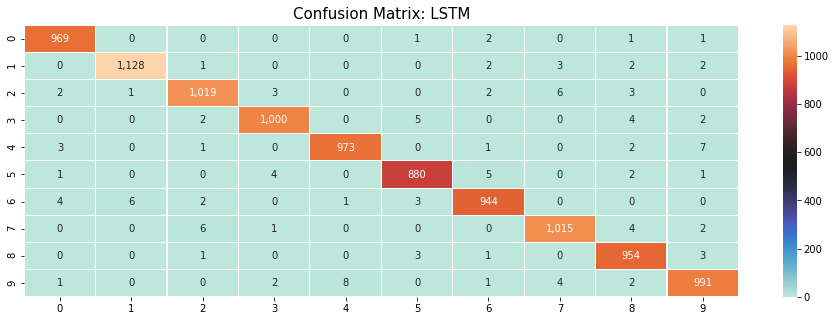

In [ ]:
plt.figure(figsize=(16, 5))
sns.heatmap(get_confusion_matrix(lstm_rnn, mnist_test), cmap='icefire', annot=True, linewidths=0.1,
           fmt = ',')
plt.title('Confusion Matrix: LSTM', fontsize=15);